For whatever reason, I get this error message in VSC when ever I try to show some distribution plots of my varibales AND I get different outcomes after removing the outliers. 

Since this gave me some doubt in the relyability on VSC at this certain point, I'll remove my outliers here, wheere I know it works. 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_with_outliers.csv")

print(len(df))

16941


In [58]:
contains_outliers = ['energy_consumption','rent','utilities_cost','heating_cost',
                     'cost_total','area']


df = df.apply(pd.to_numeric, errors='ignore') #macht jede col zur Zahl wenn möglich. 

contains_outliers = ['energy_consumption','rent','utilities_cost','heating_cost',
                     'cost_total','area']

df_outliers = df[contains_outliers]
df_outliers = df_outliers.fillna(df.median())

out_filter = (np.abs(stats.zscore(df_outliers)) < 2).all(axis=1)
print(df.shape)
print(df_outliers[out_filter].shape)

df = df[out_filter].fillna(df.mean())
print(df.shape)

(16941, 31)
(15292, 6)
(15292, 31)


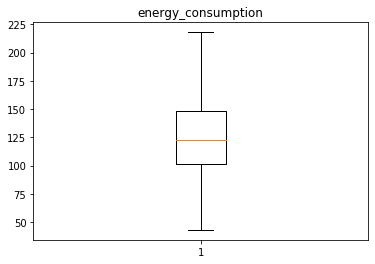

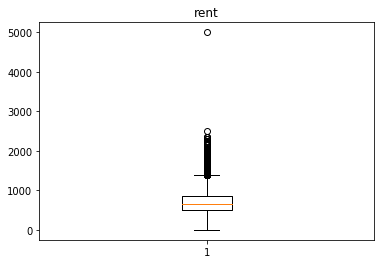

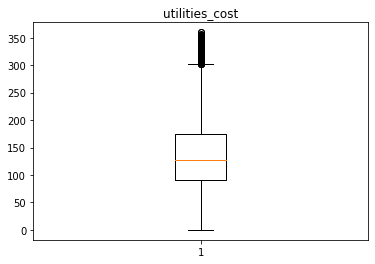

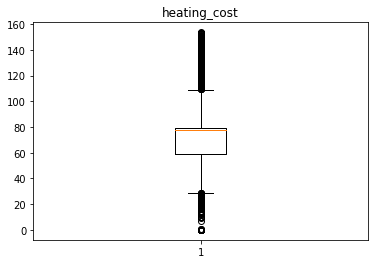

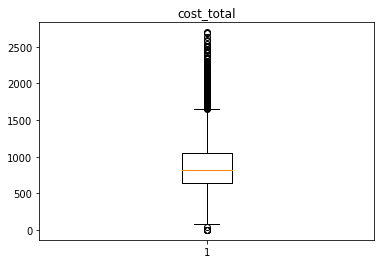

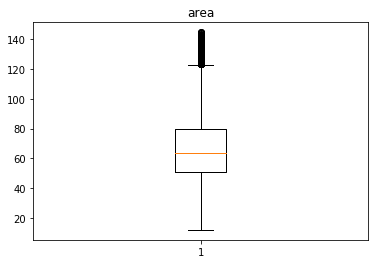

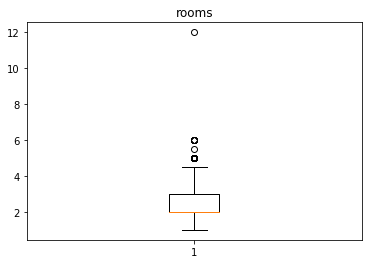

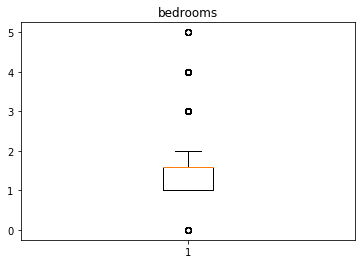

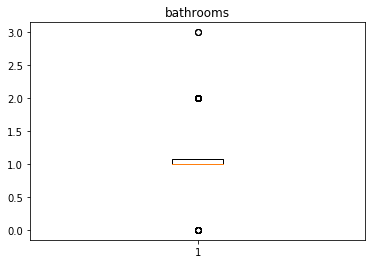

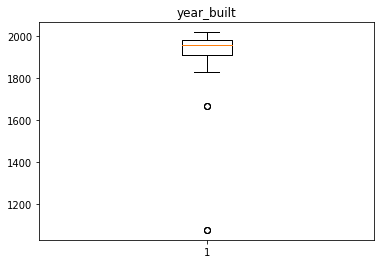

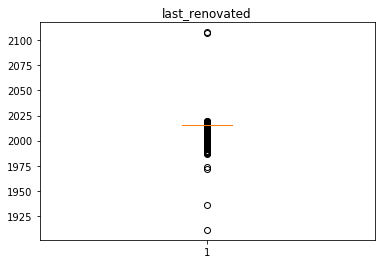

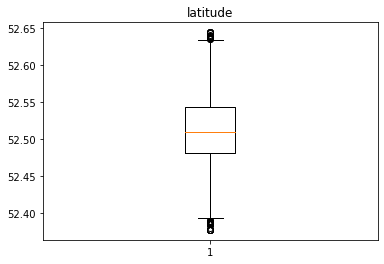

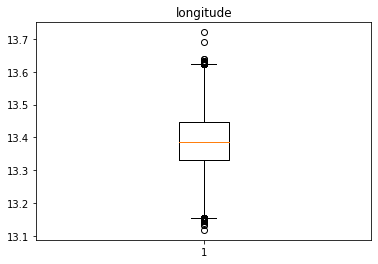

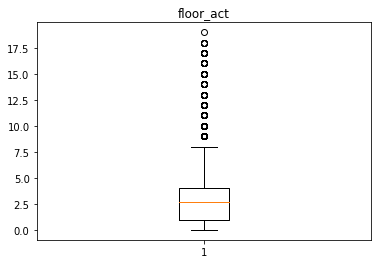

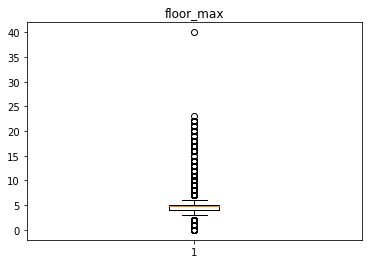

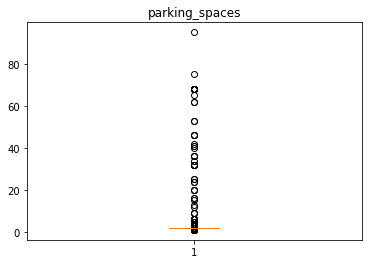

In [59]:
numericals = ['energy_consumption','rent','utilities_cost','heating_cost','cost_total',
                'area','rooms','bedrooms','bathrooms','year_built',
                'last_renovated','latitude','longitude','floor_act',
                'floor_max','parking_spaces']

for col in numericals:
    _ = plt.boxplot(df[col])
    _ = plt.title(col)
    plt.show()

In [60]:
for col in df.columns:
    print(col, sum(df[col].isnull()))

type 946
rent 0
utilities_cost 0
heating_cost 0
cost_total 0
area 0
rooms 0
pets 5653
condition 2253
quality_of_appliances 4708
heating_type 1264
energy_certificate_type 0
ground_plan 0
year_built 0
last_renovated 0
latitude 0
longitude 0
description_location 718
description_misc 2414
energy_sources 653
bedrooms 0
bathrooms 0
floor_act 0
floor_max 0
energy_consumption 0
city_code 0
description_clear 991
equipment_clear 1298
parking_spaces 0
parking_kind 13292
hot_water_included 0


In [65]:
print((5000 - np.mean(df.rent)))

4288.370254381377


In [68]:
print(stats.zscore(df.rent))

[ 0.01720105  0.2909669  -0.02526775 ... -0.03895604 -0.00736768
  0.13302506]


In [69]:
print(df.rent.describe())

count     16941.000000
mean        820.991622
std        2849.234254
min           0.000000
25%         501.190000
50%         664.000000
75%         920.000000
max      365000.000000
Name: rent, dtype: float64


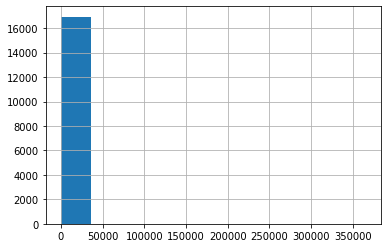

In [82]:
_= df['rent'].hist()

In [83]:
df.rent

0         870.00
1        1650.00
2         749.00
3         774.47
4         504.00
          ...   
16936     562.32
16937     459.00
16938     710.00
16939     800.00
16940    1200.00
Name: rent, Length: 16941, dtype: float64